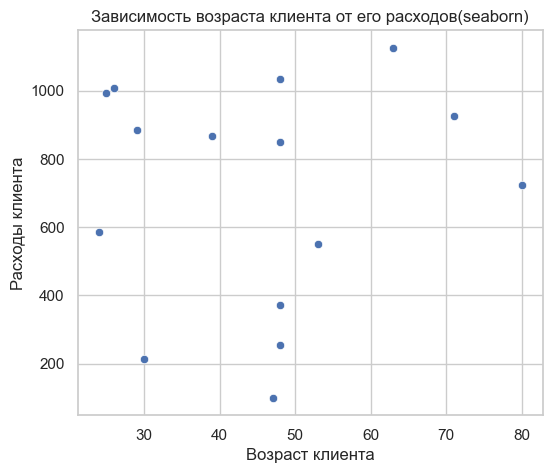

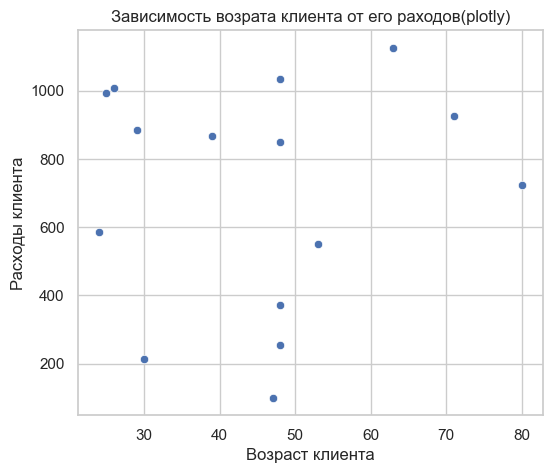

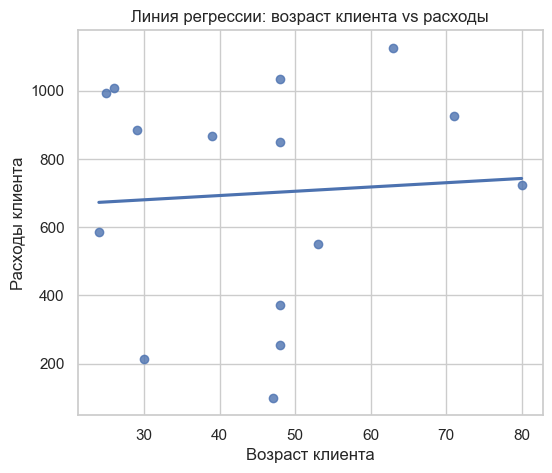

In [3]:
import pandas as pd
 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from typing import Tuple
 
 
def load_data(csv_path: str, n_rows: int = 15) -> pd.DataFrame:
    df = pd.read_csv(csv_path)
    df = df.head(n_rows)
    return df
 
 
def select_and_rename_columns(
        df: pd.DataFrame,
        age_col: str,
        expenses_col: str
    ) -> pd.DataFrame:
 
    df_small = df[[age_col, expenses_col]].copy()
    df_small = df_small.rename(columns={
        age_col: "age",
        expenses_col: "expenses"
        })
 
    return df_small
 
 
 
def preprocess_data(
        csv_path: str,
        age_col: str,
        expenses_col: str,
        n_rows: int = 15
        ) -> pd.DataFrame:
    df_raw = load_data(csv_path, n_rows)
    df = select_and_rename_columns(df_raw, age_col, expenses_col)
 
    df["age"]  = pd.to_numeric(df['age'], errors="coerce")
    df["expenses"]  = pd.to_numeric(df['expenses'], errors="coerce")
 
    df = df.dropna(subset=["age", "expenses"])
 
    return df
 
def plot_scatter_seaborn(df: pd.DataFrame, title: str) -> None:
    sns.set(style="whitegrid")
 
    plt.figure(figsize=(6,5))
    # data =df
    # x="age"
    # y="expenses"
    sns.scatterplot(data=df, x="age", y="expenses")
    plt.xlabel("Возраст клиента")
    plt.ylabel("Расходы клиента")
    plt.title(title)
    plt.show()
 
def plot_scatter_ltoly(df: pd.DataFrame, title: str) -> None:
    fig = px.scatter(
        df,
        x="age",
        y="expenses",
        title=title,
        labels={"age": "Возраст клиента", "expenses": "Расходы клиента"}
    )
 
    fig.show()
 
 
 
def run_task_1(
    csv_path: str,
    age_col: str,
    expenses_col: str,
    n_rows: int  = 15
) -> None:
    df = preprocess_data(csv_path, age_col, expenses_col, n_rows)
    plot_scatter_seaborn(df, title="Зависимость возраста клиента от его расходов(seaborn)")
    plot_scatter_seaborn(df, title="Зависимость возрата клиента от его раходов(plotly)")
 
 
def plot_regression_seaborn(df: pd.DataFrame, title: str) -> None:
    sns.set(style="whitegrid")
    plt.figure(figsize=(6,5))
    sns.regplot(
        data=df,
        x="age",
        y="expenses",
        ci=None
    )
 
    plt.xlabel("Возраст клиента")
    plt.ylabel("Расходы клиента")
    plt.title(title)
    plt.show()
 
 
def run_task_2(
    csv_path: str,
    age_col:str,
    expenses_col:str,
    n_rows: int = 15
)-> None:
    df = preprocess_data(csv_path, age_col,expenses_col, n_rows)
    plot_regression_seaborn(df, title="Линия регрессии: возраст клиента vs расходы")
 
 
 
def main() -> None:
    csv_path = "web_clients_correct_доп материал к тема 6, 7.csv"
    age_col = "age"
    expenses_col = "bill"
    run_task_1(csv_path, age_col, expenses_col)
    run_task_2(csv_path, age_col, expenses_col)
 
if __name__ == "__main__":
    main()